In [2]:
# matplotlib
!pip install seaborn

DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [3]:
import pandas as pd

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='dark')

In [5]:
import pickle

with open('df_jogos.pkl', 'rb') as pkl_file:
    df = pickle.load(pkl_file)

In [6]:
df.head()

,Nome,Preço,Jogadores Atuais,Pico de Jogadores
0,Counter-Strike 2,0,641099,1330043
1,Banana,0,449233,485762
2,Dota 2,0,341497,624244
3,Call of Duty®,0,220985,291093
4,THRONE AND LIBERTY,0,123960,147977


In [7]:
df.dtypes

Nome                 object
Preço                object
Jogadores Atuais     object
Pico de Jogadores    object
dtype: object

In [8]:
df['Preço'] = df['Preço'].astype(float)
df['Jogadores Atuais'] = df['Jogadores Atuais'].str.replace('.', '', regex=False).astype(int)
df['Pico de Jogadores'] = df['Pico de Jogadores'].str.replace('.', '', regex=False).astype(int)
df.dtypes

Nome                  object
Preço                float64
Jogadores Atuais       int32
Pico de Jogadores      int32
dtype: object

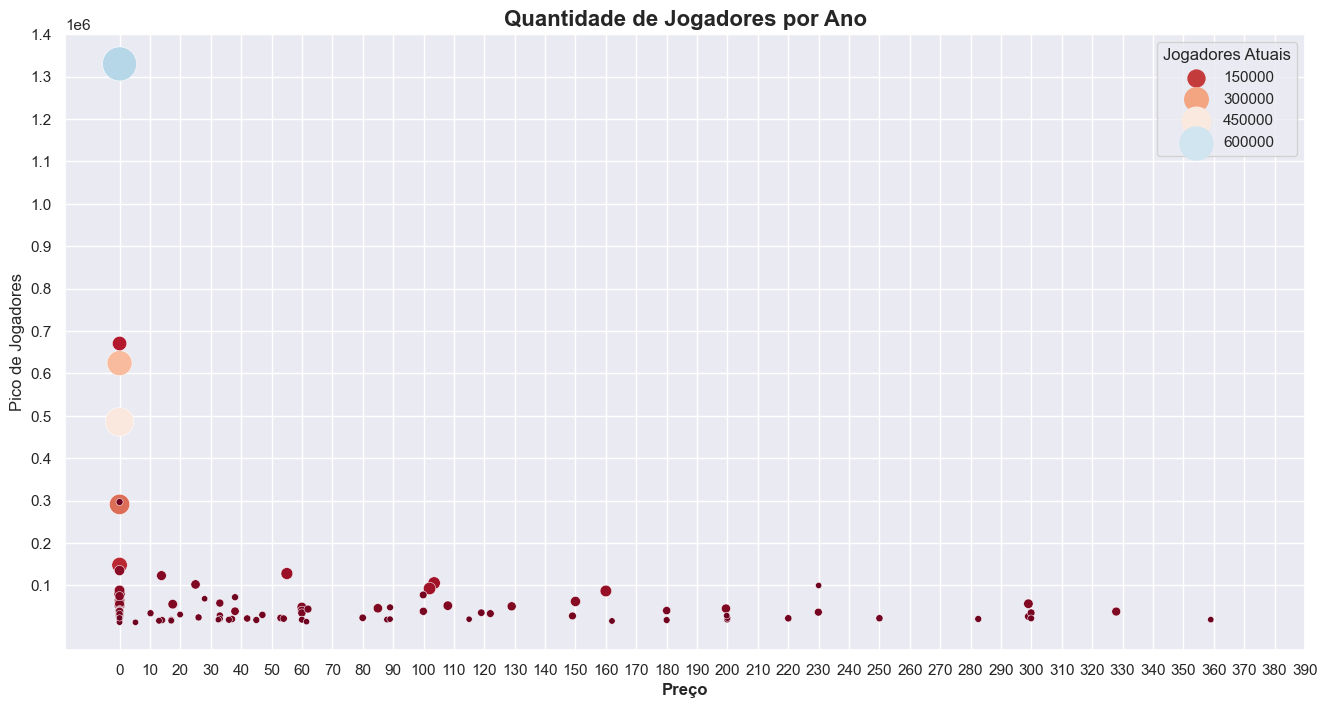

In [9]:
plt.figure(figsize=(16, 8))

sns.scatterplot(df, x='Preço', y='Pico de Jogadores',
                hue='Jogadores Atuais', palette='RdBu',
                size='Jogadores Atuais', hue_norm=(1000, 1000000), sizes=(20, 600))

# regression (regressão logística)
#sns.regplot(df, x='Preço', y='Pico de Jogadores', scatter=False, color='crimson')

plt.yticks(ticks=range(100000, 1500000, 100000))
plt.xticks(ticks=range(0, 400, 10))
plt.ylabel('Pico de Jogadores')
plt.xlabel('Preço', fontsize=12, fontweight='bold')
plt.title('Quantidade de Jogadores por Ano', fontsize=16, fontweight='bold')

plt.grid()
plt.show()

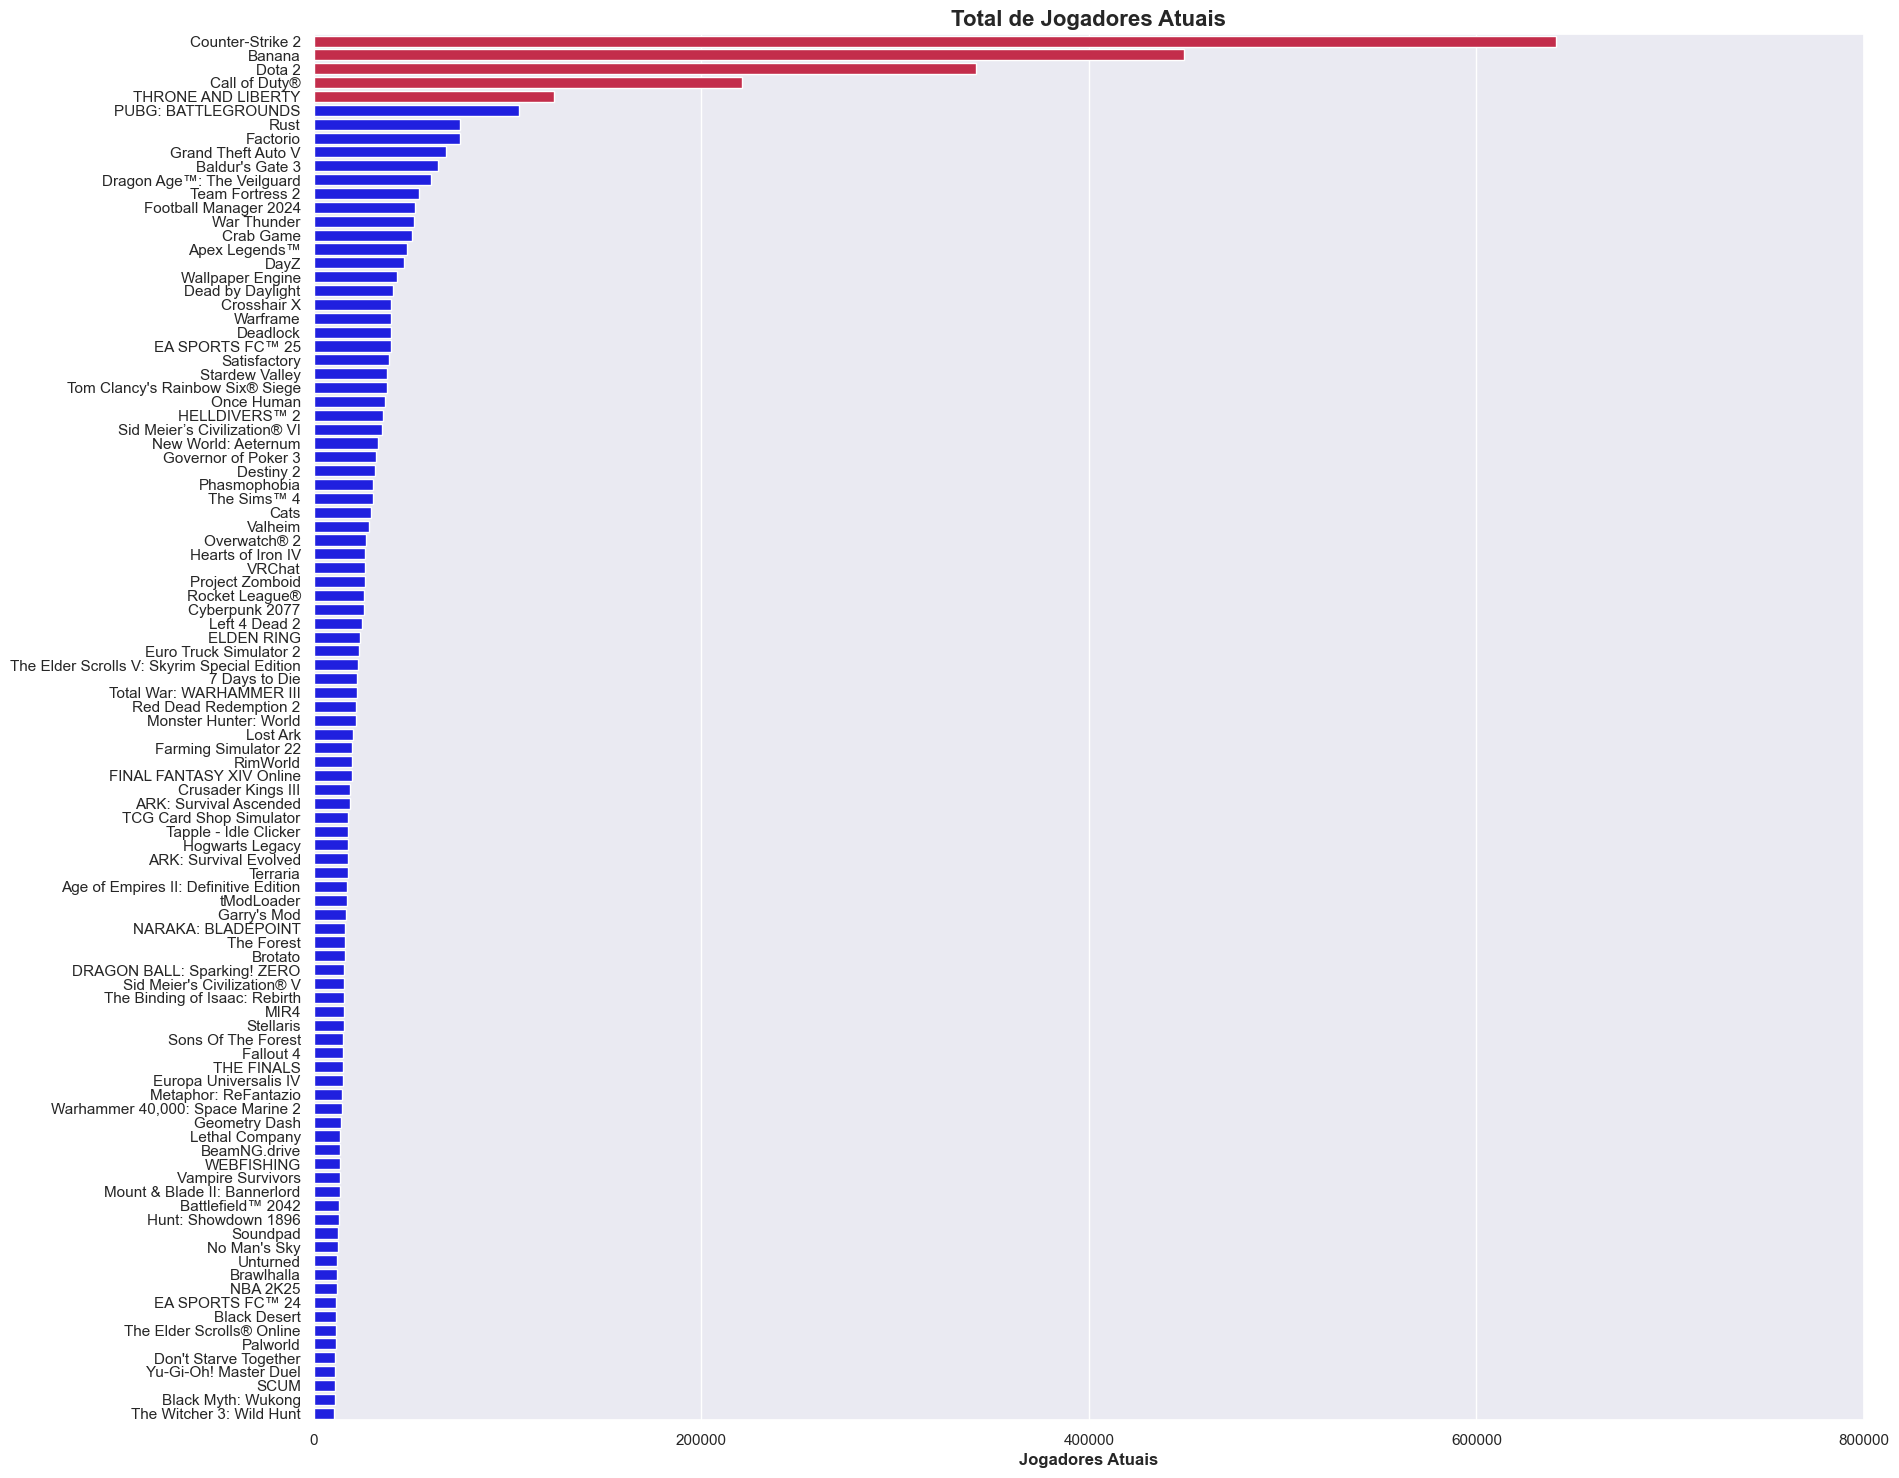

In [10]:
plt.figure(figsize=(20, 18))

# Criar o gráfico de barras horizontal
colors = ['crimson' if i < 5 else 'blue' for i in range(len(df))]
sns.barplot(data=df, 
            y='Nome', 
            x='Jogadores Atuais', 
            palette=colors)

# Configurar os ticks e os rótulos do gráfico
plt.xticks(ticks=range(0, 1000000, 200000))
plt.xlabel('Jogadores Atuais', fontsize=12, fontweight='bold')
plt.ylabel('')
plt.title('Total de Jogadores Atuais', fontsize=16, fontweight='bold')

plt.grid(axis='x')
plt.show()

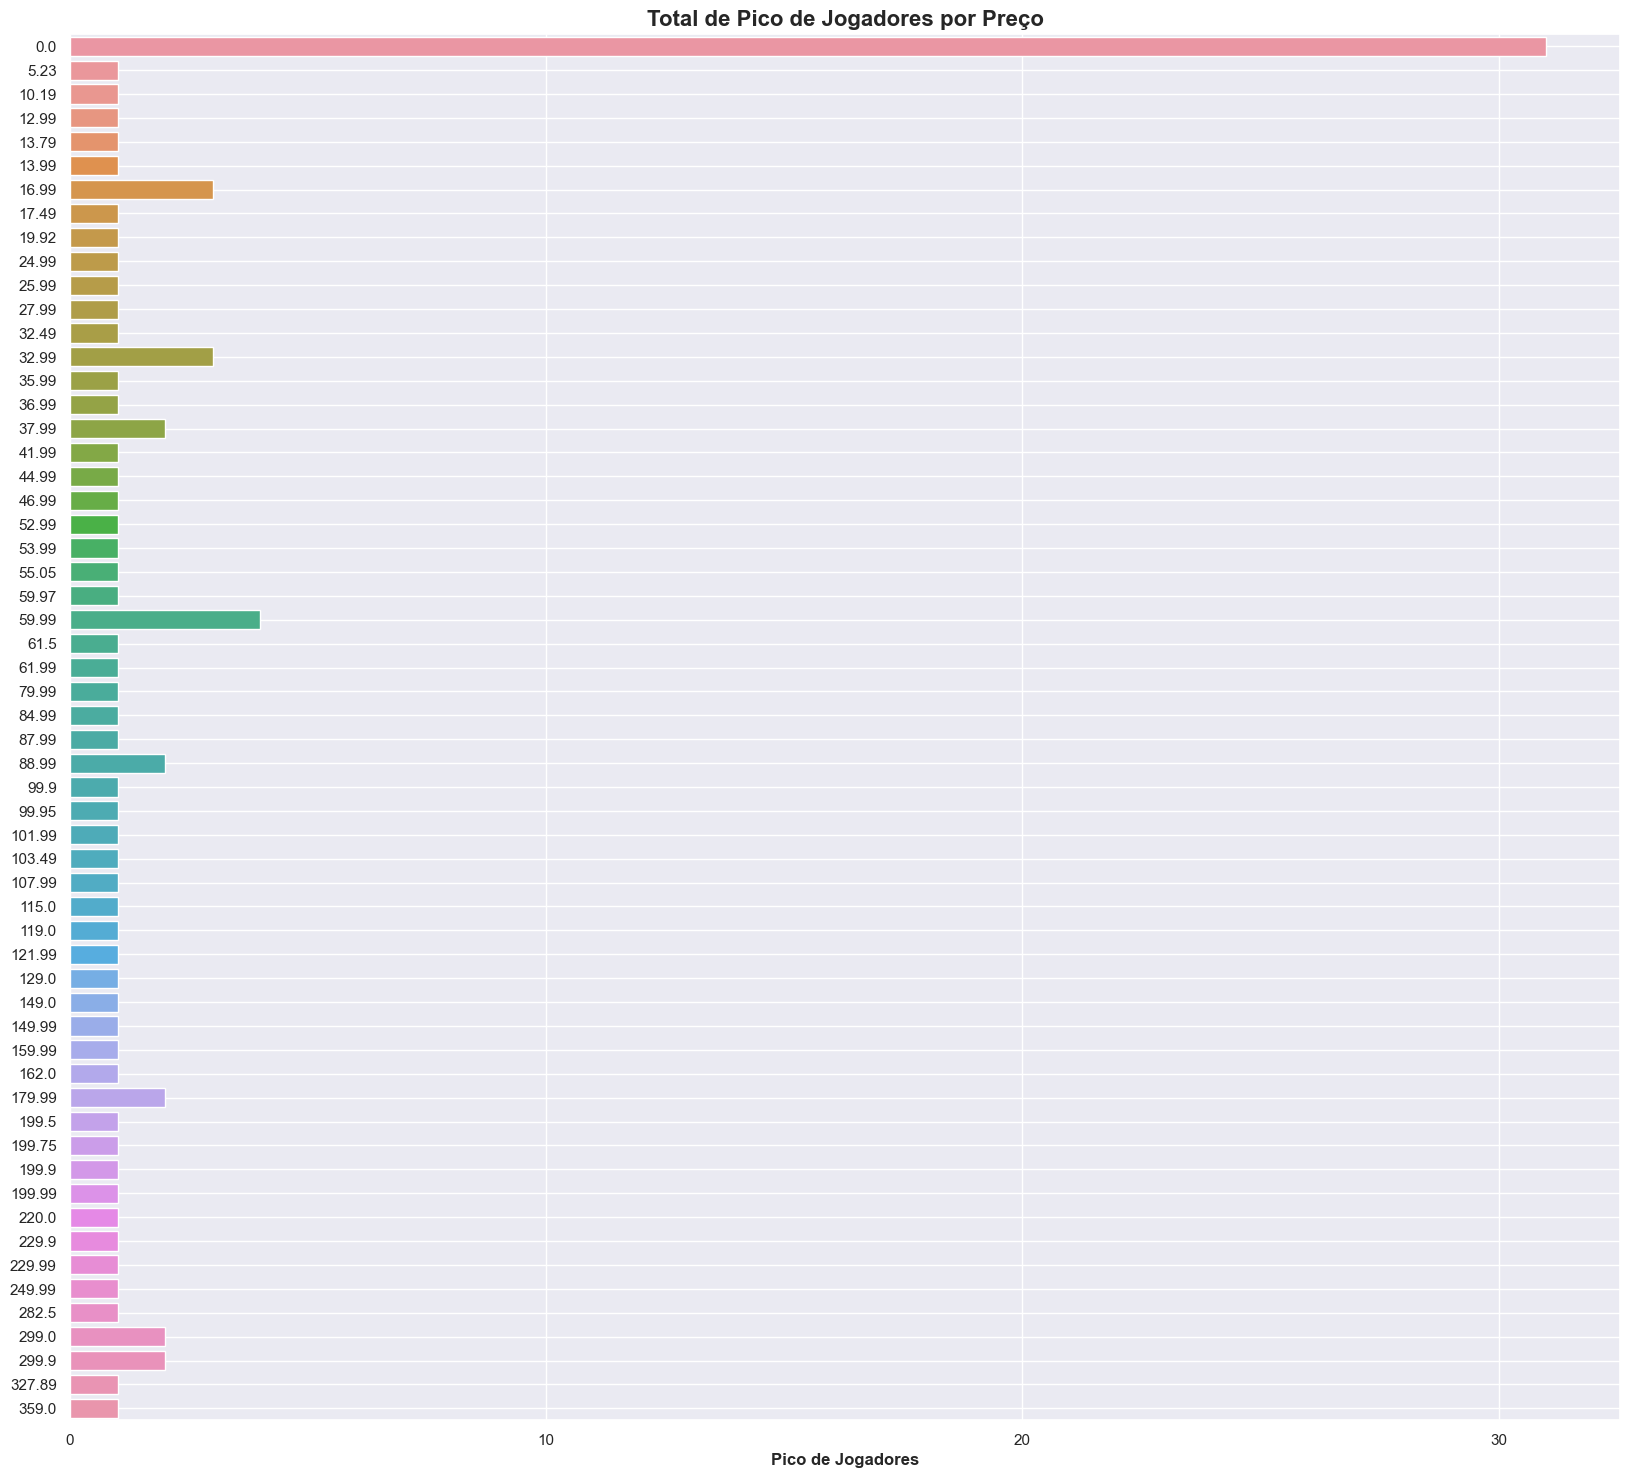

In [11]:
plt.figure(figsize=(20, 18))

# value_counts
sns.countplot(df,
              y='Preço', orient='y')

plt.xticks(ticks=range(0, 40, 10))
plt.ylabel('')
plt.xlabel('Pico de Jogadores', fontsize=12, fontweight='bold')
plt.title('Total de Pico de Jogadores por Preço', fontsize=16, fontweight='bold')

plt.grid()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


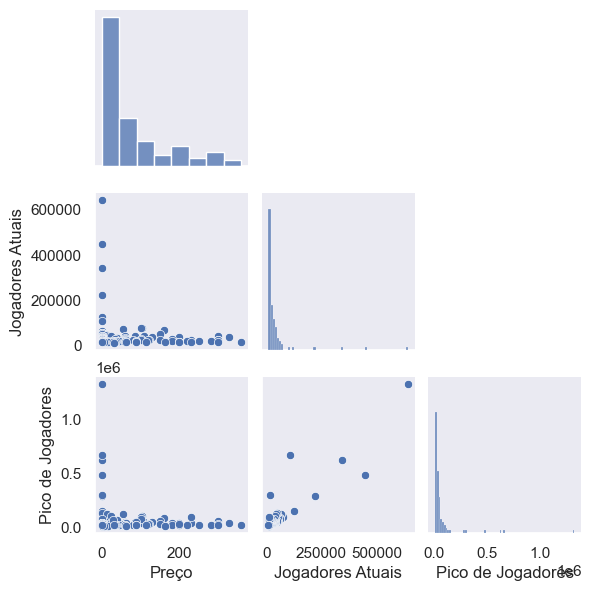

In [12]:
sns.pairplot(df, corner=True, height=2.0)

In [13]:
!pip install itables

DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..



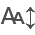

In [14]:
from itables import init_notebook_mode, show

init_notebook_mode(all_interactive=True)

In [15]:
import pandas as pd

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [16]:
show(df,
     layout={'bottom1': 'searchPanes'},
     searchPanes={'layout': 'columns-5', 'cascadePanes': True},
     buttons=['copyHtml5', 'csvHtml5', 'excelHtml5'])